In [3]:
import pandas as pd
with open("negatives_lightcurves_grouped_r_clean.parquet", "rb") as f:
    print(f.read(10))



b'object,oid'


In [4]:
df = pd.read_csv("negatives_lightcurves_grouped_r_clean.parquet")  # still works even if extension is .parquet


In [10]:
import pandas as pd

# Load your parquet file
df = pd.read_csv("negatives_lightcurves_grouped_r_clean.parquet")

# Check shape and columns
print(df_neg.shape)
print(df_neg.columns)


(1471, 27)
Index(['object', 'mean', 'weighted_mean', 'standard_deviation', 'median',
       'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10',
       'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise',
       'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2',
       'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10',
       'maximum_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage_10', 'percent_amplitude',
       'mean_variance', 'anderson_darling_normal', 'chi2', 'skew',
       'stetson_K'],
      dtype='object')


In [7]:
import pandas as pd

# Load your parquet file
df_neg = pd.read_csv("lightcurve_features_26_negative.parquet")

# Check shape and columns
print(df_neg.shape)
print(df_neg.columns)


(1471, 27)
Index(['object', 'mean', 'weighted_mean', 'standard_deviation', 'median',
       'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10',
       'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise',
       'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2',
       'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10',
       'maximum_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage_10', 'percent_amplitude',
       'mean_variance', 'anderson_darling_normal', 'chi2', 'skew',
       'stetson_K'],
      dtype='object')


In [11]:
# Assuming first column is object name / ID
features_neg = df_neg.drop(columns=['object_name'], errors='ignore')


In [12]:
# Automatically select only numeric columns
features_neg_numeric = features_neg.select_dtypes(include='number')



In [27]:
corr_neg = features_neg_numeric.corr()


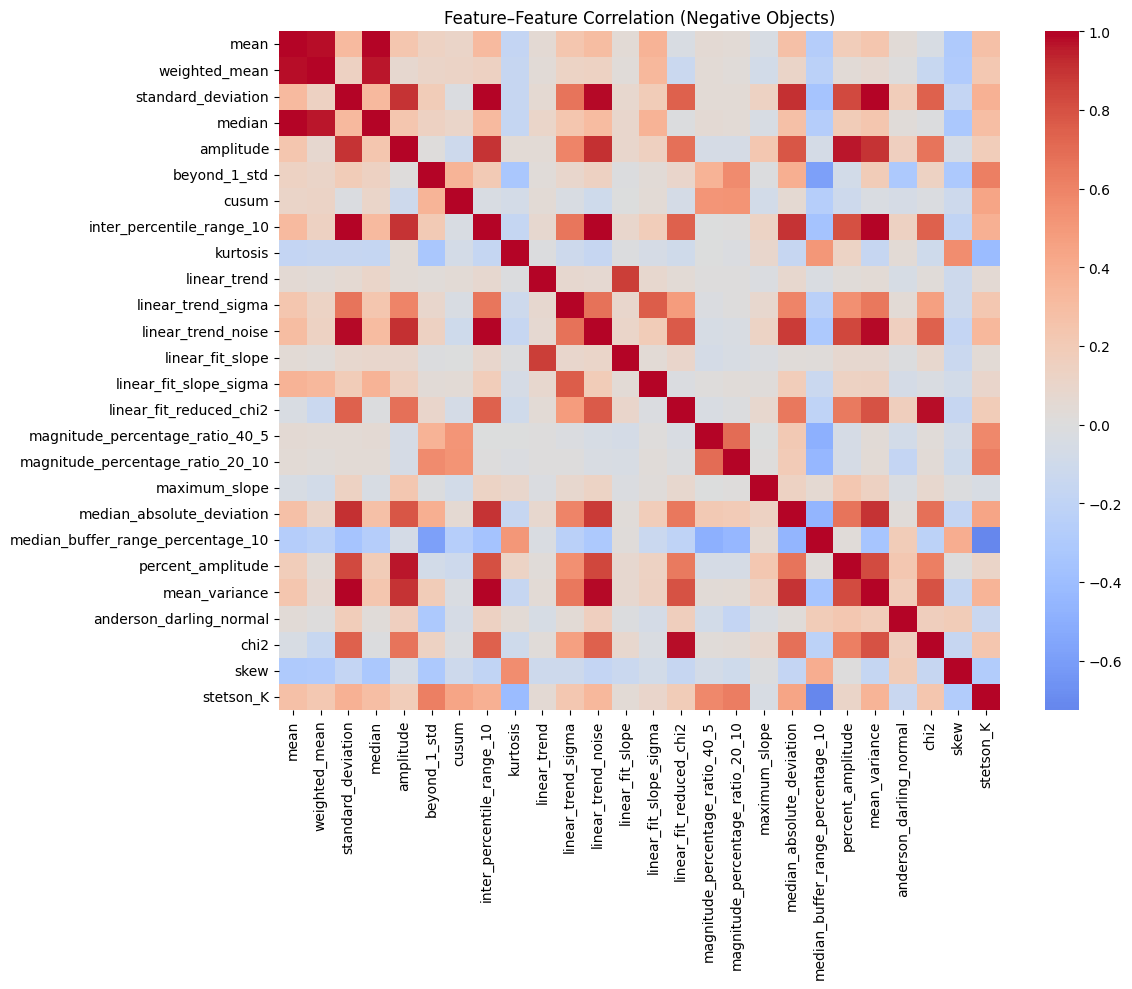

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_neg, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (Negative Objects)')
plt.tight_layout()
plt.show()


In [38]:
print(features_neg_numeric.columns.tolist())


['mean', 'weighted_mean', 'standard_deviation', 'median', 'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10', 'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise', 'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2', 'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10', 'maximum_slope', 'median_absolute_deviation', 'median_buffer_range_percentage_10', 'percent_amplitude', 'mean_variance', 'anderson_darling_normal', 'chi2', 'skew', 'stetson_K']


In [35]:
import numpy as np

# Compute correlation matrix (assuming your df is features_neg_numeric)
corr_neg = features_neg_numeric.corr()

# Convert to long format
corr_pairs = corr.unstack().sort_values(ascending=False)

# Drop self-correlations (feature with itself)
corr_pairs = corr_pairs[corr_pairs < 0.9999]

# Select strong correlations (absolute correlation > 0.7)
high_corr = corr_pairs[abs(corr_pairs) > 0.7]

print("Highly correlated feature pairs:")
print(high_corr)


Highly correlated feature pairs:
chi2                               linear_fit_reduced_chi2              0.995884
linear_fit_reduced_chi2            chi2                                 0.995884
standard_deviation                 mean_variance                        0.994173
mean_variance                      standard_deviation                   0.994173
median                             mean                                 0.991818
mean                               median                               0.991818
linear_trend_noise                 mean_variance                        0.980368
mean_variance                      linear_trend_noise                   0.980368
standard_deviation                 linear_trend_noise                   0.980225
linear_trend_noise                 standard_deviation                   0.980225
inter_percentile_range_10          standard_deviation                   0.976591
standard_deviation                 inter_percentile_range_10            0.97

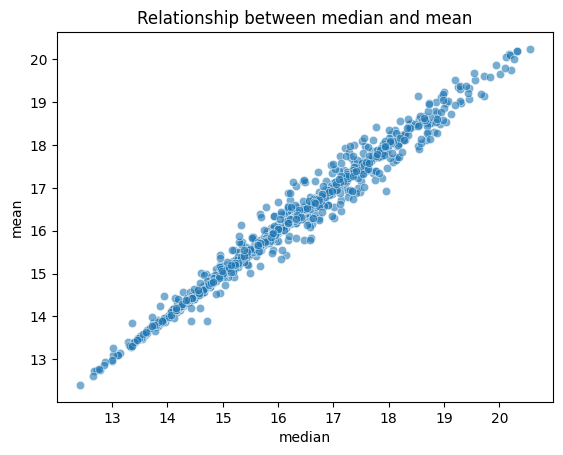

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: plot two correlated features
x_feature = 'median'
y_feature = 'mean'

sns.scatterplot(data=features_neg_numeric, x=x_feature, y=y_feature, alpha=0.6)
plt.title(f'Relationship between {x_feature} and {y_feature}')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()


In [19]:
import pandas as pd

# Load your parquet file
df_pos= pd.read_csv("lightcurve_features_26.csv")

# Check shape and columns
print(df_pos.shape)
print(df_pos.columns)

(139, 27)
Index(['object', 'mean', 'weighted_mean', 'standard_deviation', 'median',
       'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10',
       'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise',
       'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2',
       'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10',
       'maximum_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage_10', 'percent_amplitude',
       'mean_variance', 'anderson_darling_normal', 'chi2', 'skew',
       'stetson_K'],
      dtype='object')


In [20]:
features_pos = df_pos.drop(columns=['object_name'], errors='ignore')


In [22]:
features_pos_numeric = features_pos.select_dtypes(include='number')


In [31]:
corr_pos = features_pos_numeric.corr()

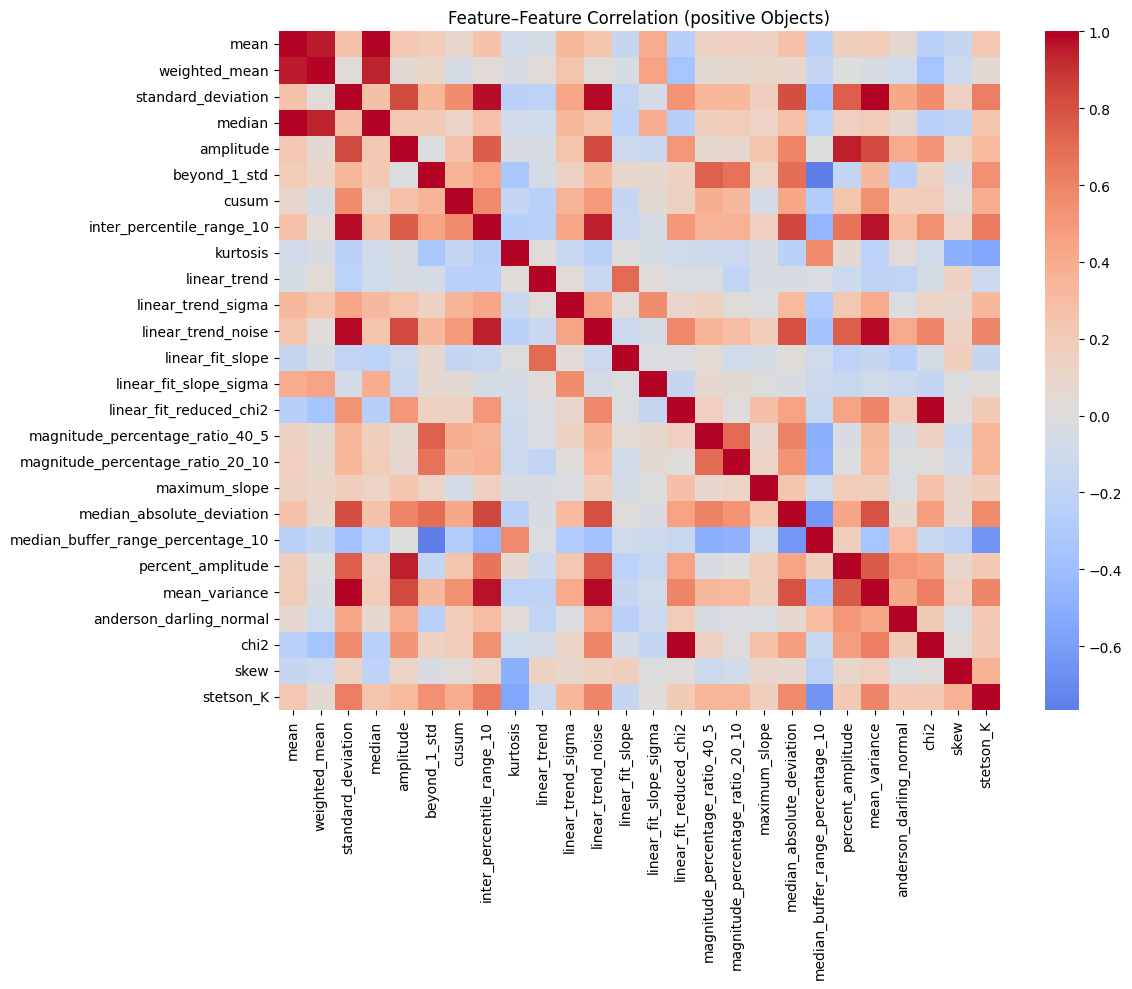

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_pos, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (positive Objects)')
plt.tight_layout()
plt.show()


In [41]:
# corrected version (requires pandas imported and features_pos_numeric defined)
import pandas as pd
import numpy as np

# Compute correlation matrix
corr_pos = features_pos_numeric.corr()

# Convert to long format and sort
corr_pairs = corr_pos.unstack().sort_values(ascending=False)

# Drop self-correlations (exactly 1.0)
corr_pairs = corr_pairs[corr_pairs < 0.9999]

# Keep only unique pairs: since unstack produces both (A,B) and (B,A), select only one
# Method: keep pairs where feature_i < feature_j (lexicographic) or use where index[0] != index[1] and drop duplicates
corr_pairs = corr_pairs[ [i < j for i, j in corr_pairs.index] ]

# Select strong correlations (absolute correlation > 0.7)
high_corr = corr_pairs[abs(corr_pairs) > 0.7]

print("Highly correlated feature pairs:")
print(high_corr)


Highly correlated feature pairs:
chi2                              linear_fit_reduced_chi2              0.995884
mean_variance                     standard_deviation                   0.994173
mean                              median                               0.991818
linear_trend_noise                mean_variance                        0.980368
                                  standard_deviation                   0.980225
inter_percentile_range_10         standard_deviation                   0.976591
                                  mean_variance                        0.971398
mean                              weighted_mean                        0.954840
inter_percentile_range_10         linear_trend_noise                   0.950534
amplitude                         percent_amplitude                    0.945692
median                            weighted_mean                        0.932140
inter_percentile_range_10         median_absolute_deviation            0.839182
amplitu

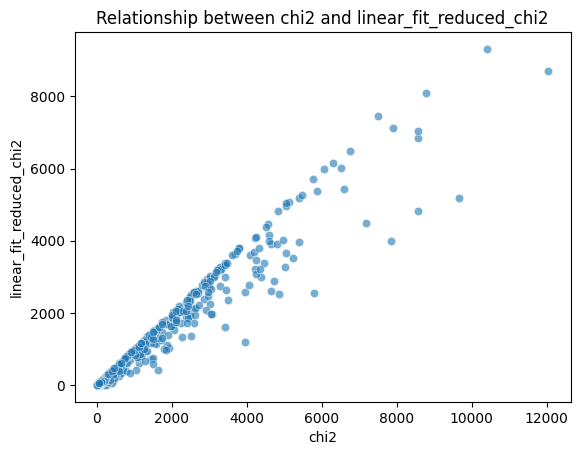

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: plot two correlated features
x_feature = 'chi2'
y_feature = 'linear_fit_reduced_chi2'

sns.scatterplot(data=features_neg_numeric, x=x_feature, y=y_feature, alpha=0.6)
plt.title(f'Relationship between {x_feature} and {y_feature}')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()

In [33]:
# corr_cv and corr_neg are correlation matrices
corr_diff = corr_pos - corr_neg


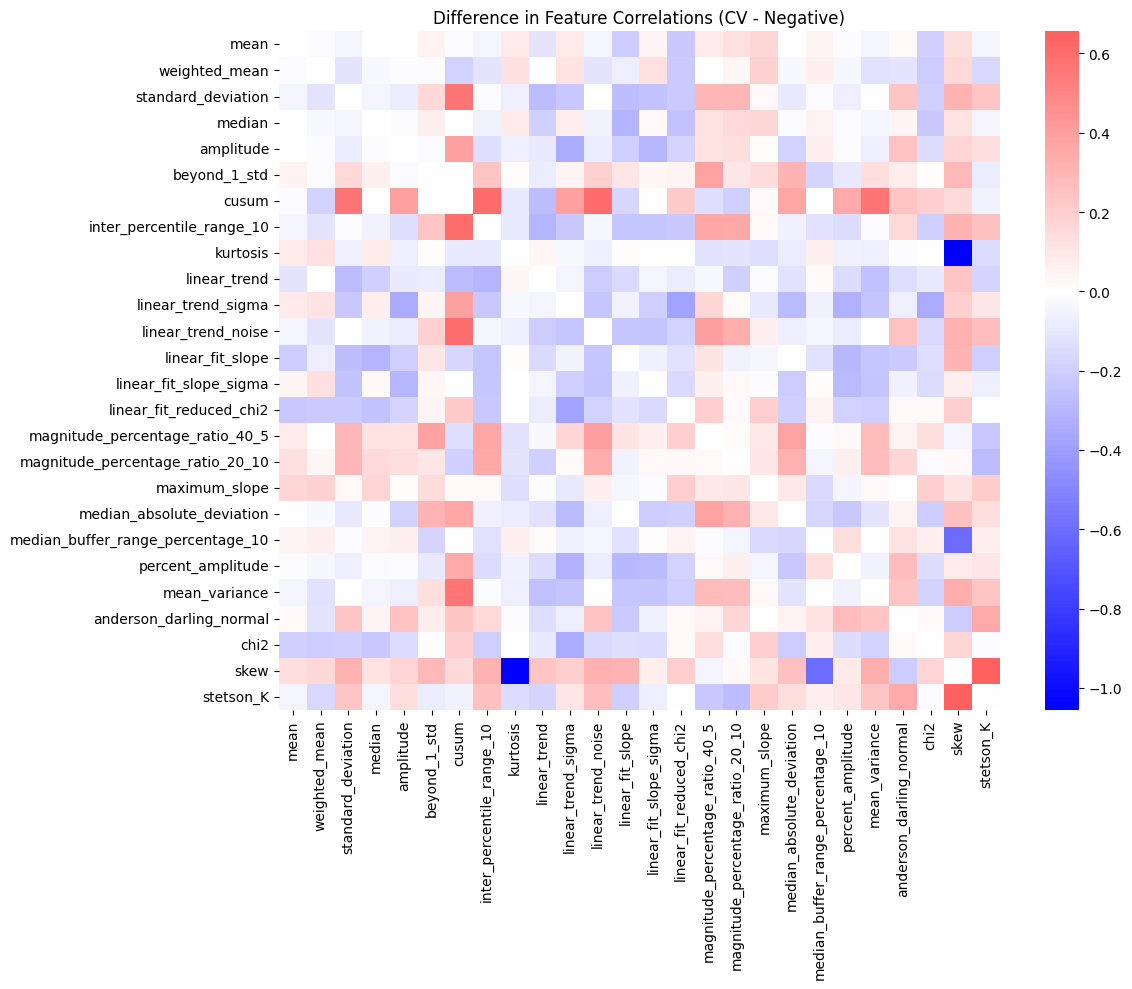

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff, cmap='bwr', center=0)
plt.title('Difference in Feature Correlations (CV - Negative)')
plt.tight_layout()
plt.show()


In [46]:
import numpy as np
import pandas as pd

# 1. Compute correlation matrices for positive and negative datasets
corr_pos = features_pos_numeric.corr()
corr_neg = features_neg_numeric.corr()

# 2. Compute the difference
corr_diff = corr_pos - corr_neg

# 3. Convert to long (pairwise) format
corr_diff_pairs = corr_diff.unstack()

# 4. Drop self-correlations (feature vs itself)
corr_diff_pairs = corr_diff_pairs[corr_diff_pairs.index.get_level_values(0) != corr_diff_pairs.index.get_level_values(1)]

# 5. Keep only one of (A,B) and (B,A) pairs to avoid duplication
corr_diff_pairs = corr_diff_pairs[ [i < j for i, j in corr_diff_pairs.index] ]

# 6. Sort by absolute difference
corr_diff_pairs = corr_diff_pairs.reindex(corr_diff_pairs.abs().sort_values(ascending=False).index)

# 7. Select feature pairs with large correlation difference
# e.g., absolute difference > 0.5, 0.5 because halfway diff is taken
high_corr_diff = corr_diff_pairs[abs(corr_diff_pairs) > 0.5]

print("Feature pairs with largest correlation difference between positive and negative sets:")
print(high_corr_diff)


Feature pairs with largest correlation difference between positive and negative sets:
kurtosis                           skew                        -1.055600
skew                               stetson_K                    0.655793
median_buffer_range_percentage_10  skew                        -0.603718
cusum                              inter_percentile_range_10    0.603159
                                   linear_trend_noise           0.589432
                                   mean_variance                0.572775
                                   standard_deviation           0.572118
dtype: float64


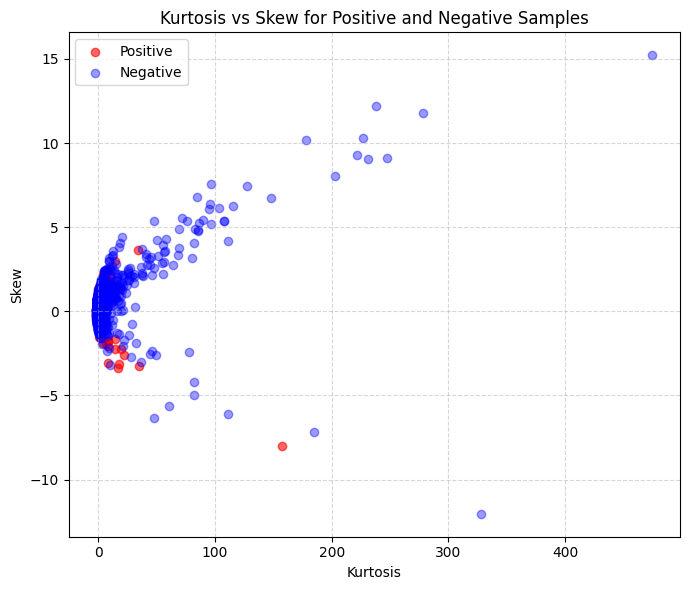

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))

# Plot positives
plt.scatter(features_pos_numeric['kurtosis'], features_pos_numeric['skew'],
            color='red', alpha=0.6, label='Positive')

# Plot negatives
plt.scatter(features_neg_numeric['kurtosis'], features_neg_numeric['skew'],
            color='blue', alpha=0.4, label='Negative')

plt.xlabel('Kurtosis')
plt.ylabel('Skew')
plt.title('Kurtosis vs Skew for Positive and Negative Samples')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


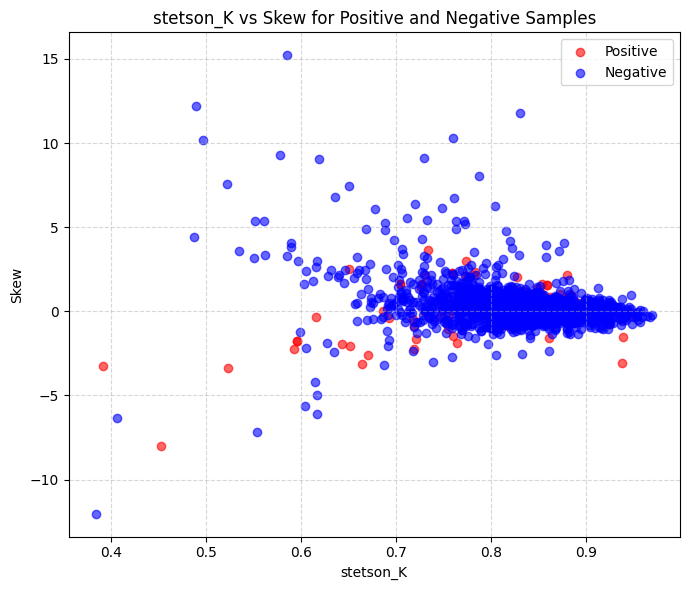

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))

# Plot positives
plt.scatter(features_pos_numeric['stetson_K'], features_pos_numeric['skew'],
            color='red', alpha=0.6, label='Positive')

# Plot negatives
plt.scatter(features_neg_numeric['stetson_K'], features_neg_numeric['skew'],
            color='blue', alpha=0.6, label='Negative')

plt.xlabel('stetson_K')
plt.ylabel('Skew')
plt.title('stetson_K vs Skew for Positive and Negative Samples')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


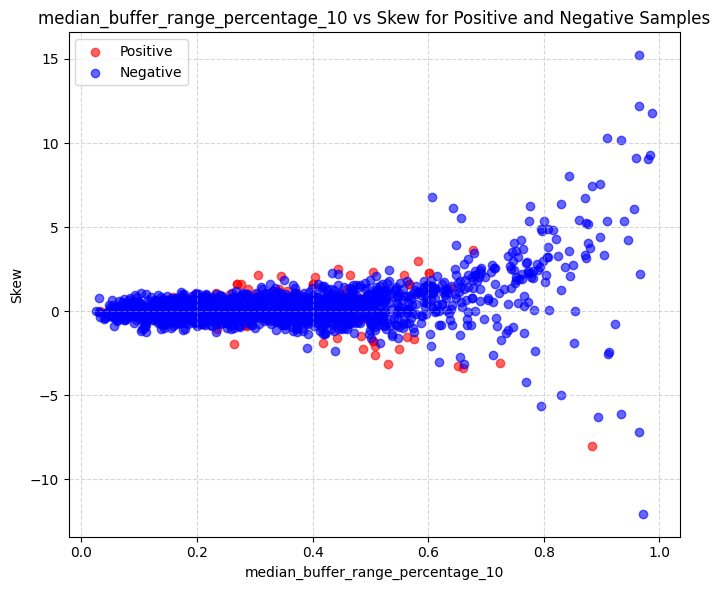

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))

# Plot positives
plt.scatter(features_pos_numeric['median_buffer_range_percentage_10'], features_pos_numeric['skew'],
            color='red', alpha=0.6, label='Positive')

# Plot negatives
plt.scatter(features_neg_numeric['median_buffer_range_percentage_10'], features_neg_numeric['skew'],
            color='blue', alpha=0.6, label='Negative')

plt.xlabel('median_buffer_range_percentage_10')
plt.ylabel('Skew')
plt.title('median_buffer_range_percentage_10 vs Skew for Positive and Negative Samples')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

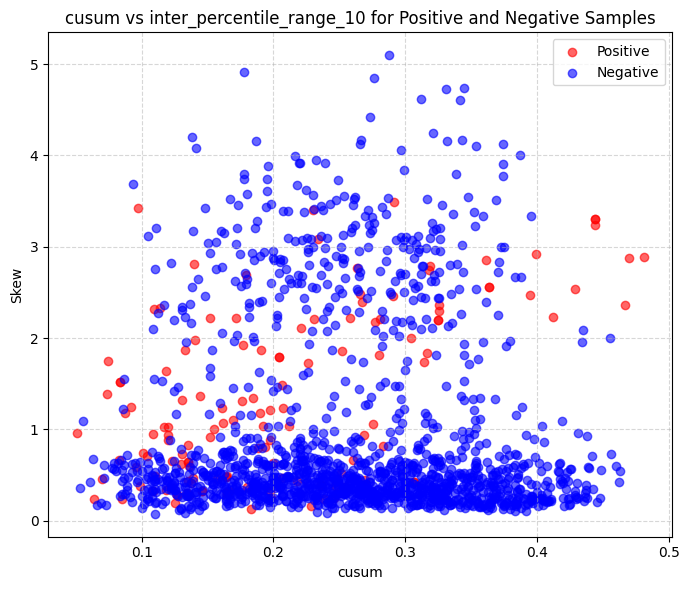

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))

# Plot positives
plt.scatter(features_pos_numeric['cusum'], features_pos_numeric['inter_percentile_range_10'],
            color='red', alpha=0.6, label='Positive')

# Plot negatives
plt.scatter(features_neg_numeric['cusum'], features_neg_numeric['inter_percentile_range_10'],
            color='blue', alpha=0.6, label='Negative')

plt.xlabel('cusum')
plt.ylabel('inter_percentile_range_10')
plt.title('cusum vs inter_percentile_range_10 for Positive and Negative Samples')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

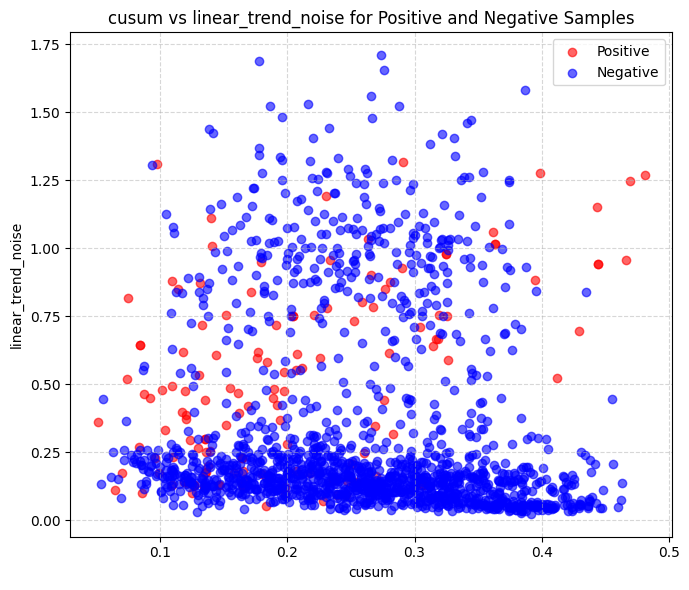

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))

# Plot positives
plt.scatter(features_pos_numeric['cusum'], features_pos_numeric['linear_trend_noise'],
            color='red', alpha=0.6, label='Positive')

# Plot negatives
plt.scatter(features_neg_numeric['cusum'], features_neg_numeric['linear_trend_noise'],
            color='blue', alpha=0.6, label='Negative')

plt.xlabel('cusum')
plt.ylabel('linear_trend_noise')
plt.title('cusum vs linear_trend_noise for Positive and Negative Samples')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

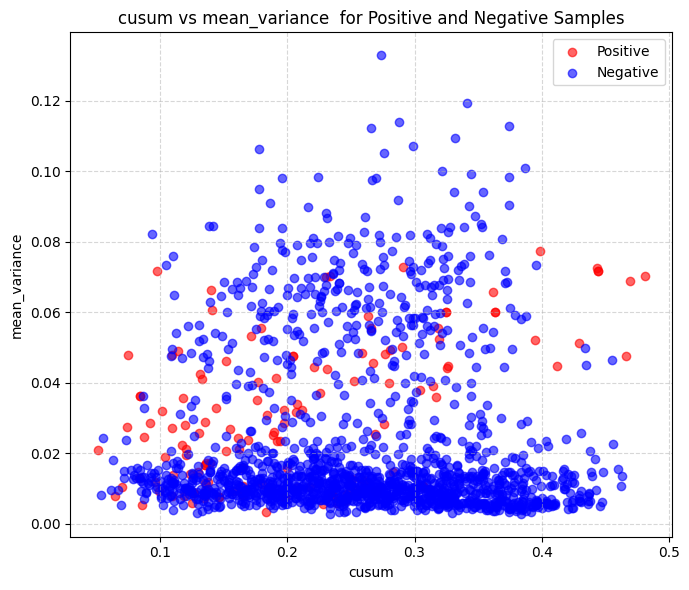

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))

# Plot positives
plt.scatter(features_pos_numeric['cusum'], features_pos_numeric['mean_variance'],
            color='red', alpha=0.6, label='Positive')

# Plot negatives
plt.scatter(features_neg_numeric['cusum'], features_neg_numeric['mean_variance'],
            color='blue', alpha=0.6, label='Negative')

plt.xlabel('cusum')
plt.ylabel('mean_variance')
plt.title('cusum vs mean_variance  for Positive and Negative Samples')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

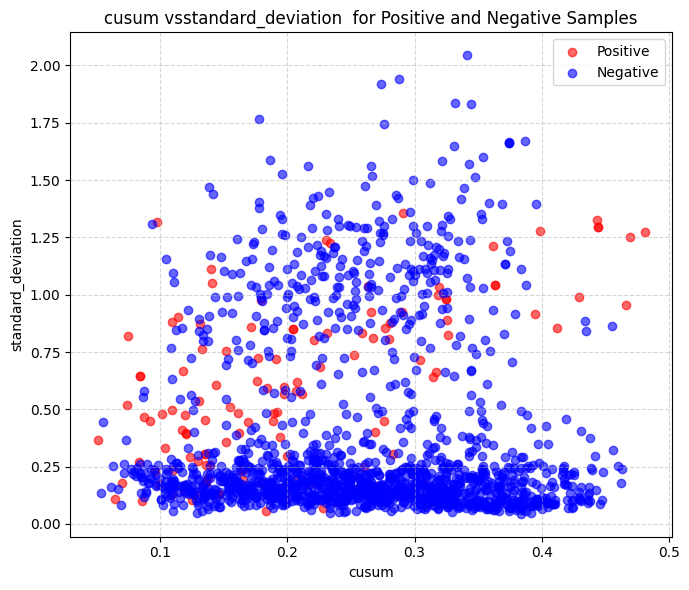

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))

# Plot positives
plt.scatter(features_pos_numeric['cusum'], features_pos_numeric['standard_deviation'],
            color='red', alpha=0.6, label='Positive')

# Plot negatives
plt.scatter(features_neg_numeric['cusum'], features_neg_numeric['standard_deviation'],
            color='blue', alpha=0.6, label='Negative')

plt.xlabel('cusum')
plt.ylabel('standard_deviation')
plt.title('cusum vsstandard_deviation  for Positive and Negative Samples')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()